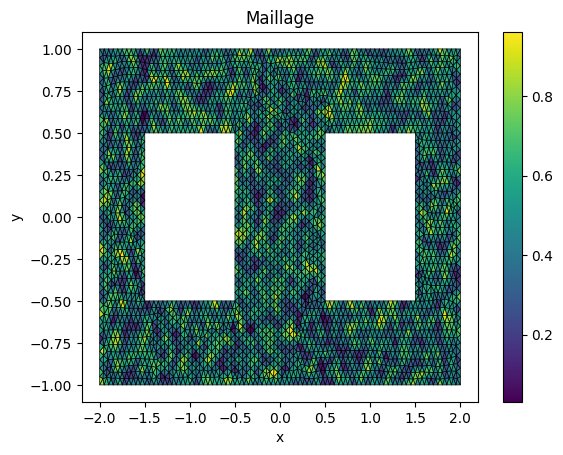

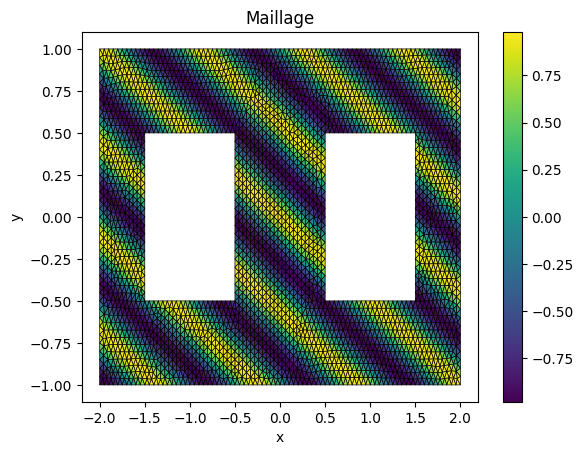

done


In [2]:
import matplotlib.tri as tri
import numpy as np
from matplotlib import pyplot as plt

def PrintFile(filename):
    with open(filename, 'r') as file:
        for line in file:
        	print(line, end='')

def LoadVTX(filename):
    with open(filename, 'r') as file:
        # Chercher le mot-clé '$Noeuds'
        while file.readline().strip() != '$Noeuds':
            continue
        
        # Lire la ligne suivante pour obtenir le nombre de nœuds
        nbr_vtx = int(file.readline().strip())
        
        # Initialiser le tableau pour stocker les coordonnées des nœuds
        nodes = np.zeros((nbr_vtx, 2))
        
        # Lire les coordonnées des nœuds et les stocker dans le tableau
        for i in range(nbr_vtx):
            line = file.readline().strip()
            num_vtx, x_coord, y_coord = line.split()
            nodes[i, 0] = float(x_coord)
            nodes[i, 1] = float(y_coord)

    return nodes

def LoadELT(filename):
    with open(filename, 'r') as file:
        # Chercher le mot-clé '$Elements'
        while file.readline().strip() != '$Elements':
            continue
        
        # Lire la ligne suivante pour obtenir le nombre d'éléments (triangles)
        nbr_elt = int(file.readline().strip())
        
        # Initialiser le tableau pour stocker les triangles du maillage
        triangles = np.zeros((nbr_elt, 3), dtype=int)
        
        # Lire les informations sur les triangles et les stocker dans le tableau
        for i in range(nbr_elt):
            line = file.readline().strip()
            num_elt, num_vtx1, num_vtx2, num_vtx3 = line.split()
            triangles[i, 0] = int(num_vtx1) 
            triangles[i, 1] = int(num_vtx2) 
            triangles[i, 2] = int(num_vtx3) 

    return triangles

def GenerateMesh(filename, n_horizontal, n_vertical, length_horizontal, length_vertical):
    nbr_vtx = (n_horizontal + 1) * (n_vertical + 1)
    nbr_elt = 2 * n_horizontal * n_vertical

    with open(filename, 'w') as file:
        file.write('$Noeuds\n')
        file.write(f'{nbr_vtx}\n')

        for j in range(n_vertical + 1):
            for i in range(n_horizontal + 1):
                x_coord = i * length_horizontal / n_horizontal
                y_coord = j * length_vertical / n_vertical
                file.write(f'{i + j * (n_horizontal + 1)} {x_coord} {y_coord}\n')

        file.write('$FinNoeuds\n')
        file.write('$Elements\n')
        file.write(f'{nbr_elt}\n')

        for j in range(n_vertical):
            for i in range(n_horizontal):
                num_vtx1 = i + j * (n_horizontal + 1)
                num_vtx2 = num_vtx1 + 1
                num_vtx3 = num_vtx1 + n_horizontal + 1
                num_vtx4 = num_vtx3 + 1
                file.write(f'{2 * (i + j * n_horizontal)} {num_vtx1} {num_vtx2} {num_vtx3}\n')
                file.write(f'{2 * (i + j * n_horizontal) + 1} {num_vtx2} {num_vtx3} {num_vtx4}\n')

        file.write('$FinElements\n')

#PrintFile("maillage1.msh")
#A=LoadVTX("maillage1.msh")
LoadELT("maillage1.msh")

def PlotMesh(vtx, elt, val=None):
    plt.figure()
    
    if val is None:
        plt.triplot(vtx[:, 0], vtx[:, 1], elt)
    else:
        cmap = plt.get_cmap('viridis')
        triang = tri.Triangulation(vtx[:, 0], vtx[:, 1], elt)
        plt.tripcolor(triang, val, cmap=cmap, shading='flat', edgecolors='k', lw=0.5)
        plt.colorbar()

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Maillage')
    plt.show()

elt = LoadELT("maillage3.msh")

# Générer des valeurs nodales aléatoires pour l'interpolation linéaire
vtx = LoadVTX("maillage3.msh")
nbr_vtx = vtx.shape[0]
val = np.random.rand(nbr_vtx)

PlotMesh(vtx, elt, val)

#normalisation vecteur
d = np.array([1, 2])
d = d / np.linalg.norm(d)

#Calcul valeurs nodales de la fonction f(x) pour chaque sommet du maillage
nbr_vtx = vtx.shape[0]
val = np.zeros(nbr_vtx)
for i in range(nbr_vtx):
    val[i] = np.cos(4 * np.pi * np.dot(d, vtx[i]))

# 4. Utiliser la fonction PlotMesh pour afficher l'interpolation linéaire des valeurs nodales sur le maillage
PlotMesh(vtx, elt, val)

print("done")